In [1]:
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
player_data=pd.read_csv('data/players.csv')

In [3]:
player_data.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN


In [4]:
player_data.isnull().sum()

Age                      3668
Birth Place              2378
Birthday                  337
College                    39
Current Status              0
Current Team            14076
Experience                 39
Height (inches)           146
High School             14658
High School Location    14662
Name                        0
Number                  15464
Player Id                   0
Position                14076
Weight (lbs)               51
Years Played             3096
dtype: int64

In [5]:
cols=['Age','Birth Place','Current Team','High School','High School Location','Number','Position','Years Played']
player_data.drop(columns=cols,inplace=True)

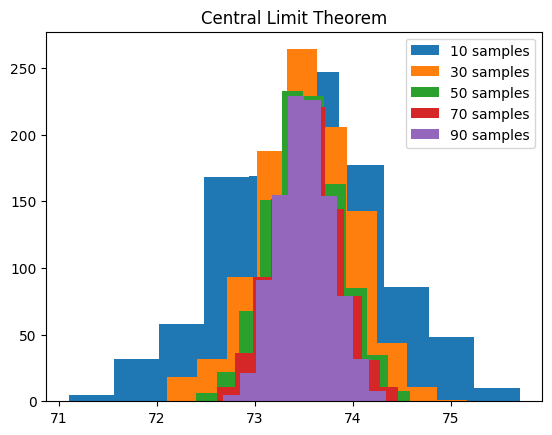

In [6]:
import matplotlib.pyplot as plt

sample_amounts = range(10, 100, 20)
for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(player_data['Height (inches)'].sample(x).mean())
    plt.hist(samples)

plt.legend([str(z) + " samples" for z in sample_amounts])
plt.title("Central Limit Theorem")
plt.show()

In [7]:
player_data['Height (inches)'].sem()

0.01975443616005487

In [8]:
from sklearn.utils import resample

# Number of bootstrap resamples
num_resamples = 1000

# Perform bootstrapping
results = []
for _ in range(num_resamples):
    sample = resample(player_data['Height (inches)'])
    results.append(sample.mean())

results = pd.Series(results)

print("Bootstrap Statistics:")
print("Original Mean:", player_data['Height (inches)'].mean())
print("Bias: ", results.mean()-player_data['Height (inches)'].mean())
print("std.error: ",results.std())


Bootstrap Statistics:
Original Mean: 73.50839891929989
Bias:  -0.00016468513634038118
std.error:  0.020459394924946514


In [9]:
import numpy as np
import scipy.stats as st

#define sample data
data=player_data['Height (inches)'].sample(20)

#create 95% conifdence interval for population weigth
st.t.interval(alpha=0.95,df=len(data)-1,loc=np.mean(data),scale=st.sem(data))

(72.11347153846559, 74.78652846153442)

In [10]:
import numpy as np
import scipy.stats as st

data=player_data['Height (inches)'].sample(20)

#Create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.95,loc=np.mean(data),scale=st.sem(data))

(71.9159004181988, 73.88409958180121)

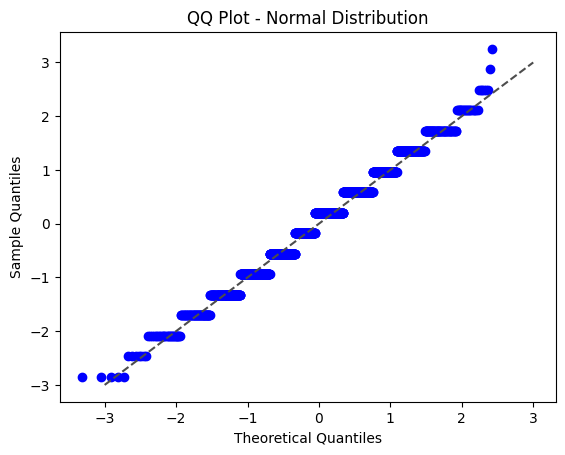

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example data
data = player_data['Height (inches)'].sample(1500)

# Calculate z-scores
z_scores = (data - np.mean(data)) / np.std(data)

# Generate the QQ plot
stats.probplot(z_scores, dist='norm', plot=plt)

# Add a reference line for a perfect normal distribution (optional)
plt.plot([-3, 3], [-3, 3], ls="--", c=".3")

# Show the plot
plt.title("QQ Plot - Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


In [14]:
import scipy.stats as stats

# Probability Mass Function (pmf) for getting exactly 2 successes
print(f"pmf: {stats.binom.pmf(2, n=5, p=0.1)}")

# Cumulative Distribution Function (cdf) for getting up to 2 successes
print(f"cdf: {stats.binom.cdf(2, n=5, p=0.1)}")


pmf: 0.07289999999999992
cdf: 0.99144
